In [46]:
# Configuración warnings
# ------------------------------------------------------------------------------
import warnings
#warnings.filterwarnings('once')
warnings.filterwarnings('ignore')

In [1]:
# Loading dataset fashion_mnist
#Fashion-MNIST is a Zalando item image dataset consisting of a training set of 60,000 examples and a test set of 10,000 examples.
# Each example is a 28x28 grayscale image, associated with a 10-class label.

from keras.datasets import fashion_mnist
(train_X,train_Y), (test_X,test_Y) = fashion_mnist.load_data()


4431872/4422102 [==============================] - 0s 0us/step


In [4]:
# analyzing the dataset
import numpy as np
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
%matplotlib inline

print('Training data shape : ', train_X.shape, train_Y.shape)

print('Testing data shape : ', test_X.shape, test_Y.shape)


Training data shape :  (60000, 28, 28) (60000,)
Testing data shape :  (10000, 28, 28) (10000,)


In [5]:
# Find the unique numbers from the train labels
classes = np.unique(train_Y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)


Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


Text(0.5, 1.0, 'Ground Truth : 9')

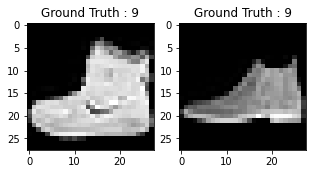

In [6]:
# Showing a couple of images

plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_Y[0]))


In [8]:
# As a first step, convert each 28 x 28 image of the train and test set into a matrix of size 28 x 28 x 1 
# which is fed into the network.
train_X = train_X.reshape(-1, 28,28, 1)
test_X = test_X.reshape(-1, 28,28, 1)
train_X.shape, test_X.shape



((60000, 28, 28, 1), (10000, 28, 28, 1))

In [9]:
# The data right now is in an int8 format, so before you feed it into the network you need to convert its type to float32, 
# and you also have to rescale the pixel values in range 0 - 1 inclusive. 
# gray scale of 8 digits  = 256 gray level


train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255.
test_X = test_X / 255.



In [10]:
# Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

# Display the change for category label using one-hot encoding
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])


Original label: 9
After conversion to one-hot: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [11]:
from sklearn.model_selection import train_test_split
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)


In [12]:
train_X.shape,valid_X.shape,train_label.shape,valid_label.shape


((48000, 28, 28, 1), (12000, 28, 28, 1), (48000, 10), (12000, 10))

In [20]:
import keras
import tensorflow as tf
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU


In [15]:
batch_size = 64
epochs = 20
num_classes = 10


Architecture of the CNN

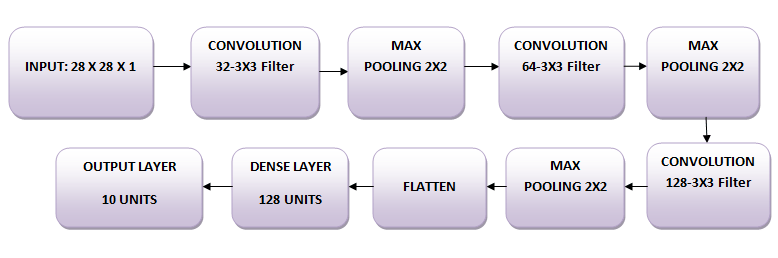

In [16]:
fashion_model = Sequential()
fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(28,28,1),padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2, 2),padding='same'))
fashion_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation='linear'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(Dense(num_classes, activation='softmax'))



In [21]:
# Building the model with Adam optimizer

fashion_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])


In [22]:
# Model 
fashion_model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 128)         7

In [23]:
# training the model
fashion_train = fashion_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))


Epoch 1/20
750/750 [==============================] - 20s 22ms/step - loss: 0.4715 - accuracy: 0.8274 - val_loss: 0.4230 - val_accuracy: 0.8499
Epoch 2/20
750/750 [==============================] - 16s 22ms/step - loss: 0.2915 - accuracy: 0.8932 - val_loss: 0.2804 - val_accuracy: 0.8976
Epoch 3/20
750/750 [==============================] - 16s 22ms/step - loss: 0.2443 - accuracy: 0.9099 - val_loss: 0.2529 - val_accuracy: 0.9087
Epoch 4/20
750/750 [==============================] - 17s 23ms/step - loss: 0.2130 - accuracy: 0.9217 - val_loss: 0.2465 - val_accuracy: 0.9117
Epoch 5/20
750/750 [==============================] - 16s 21ms/step - loss: 0.1896 - accuracy: 0.9302 - val_loss: 0.2226 - val_accuracy: 0.9191
Epoch 6/20
750/750 [==============================] - 16s 22ms/step - loss: 0.1637 - accuracy: 0.9382 - val_loss: 0.2236 - val_accuracy: 0.9209
Epoch 7/20
750/750 [==============================] - 16s 21ms/step - loss: 0.1445 - accuracy: 0.9464 - val_loss: 0.2366 - val_accuracy:

In [24]:
# Evaluation with test dataset
test_eval = fashion_model.evaluate(test_X, test_Y_one_hot, verbose=0)


In [25]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])


Test loss: 0.5286841988563538
Test accuracy: 0.9079999923706055


In [47]:
# Test loss is high

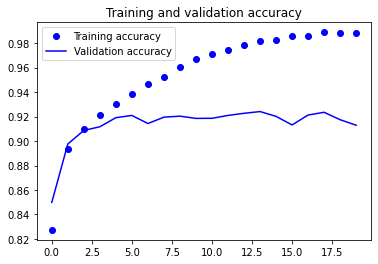

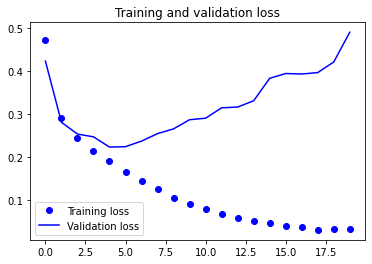

In [29]:
# Curves of training and test

accuracy = fashion_train.history['accuracy']
val_accuracy = fashion_train.history['val_accuracy']
loss = fashion_train.history['loss']
val_loss = fashion_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


In [30]:
# Adding Dropout into the Network for preventing overfitting
# Dropout randomly turns off a fraction of neurons during the 
# training process, reducing the dependency on the training set by some amount.
batch_size = 64
epochs = 20
num_classes = 10


In [31]:
# New model with dropout

fashion_model = Sequential()
fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(28,28,1)))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2, 2),padding='same'))
fashion_model.add(Dropout(0.25))
fashion_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Dropout(0.25))
fashion_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Dropout(0.4))
fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation='linear'))
fashion_model.add(LeakyReLU(alpha=0.1))           
fashion_model.add(Dropout(0.3))
fashion_model.add(Dense(num_classes, activation='softmax'))


In [32]:
fashion_model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 64)         

In [33]:
fashion_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])


In [34]:
fashion_train_dropout = fashion_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))


Epoch 1/20
750/750 [==============================] - 20s 26ms/step - loss: 0.5894 - accuracy: 0.7823 - val_loss: 0.3827 - val_accuracy: 0.8613
Epoch 2/20
750/750 [==============================] - 19s 26ms/step - loss: 0.3709 - accuracy: 0.8638 - val_loss: 0.2981 - val_accuracy: 0.8888
Epoch 3/20
750/750 [==============================] - 20s 27ms/step - loss: 0.3228 - accuracy: 0.8809 - val_loss: 0.2790 - val_accuracy: 0.8968
Epoch 4/20
750/750 [==============================] - 20s 27ms/step - loss: 0.2963 - accuracy: 0.8914 - val_loss: 0.2653 - val_accuracy: 0.9026
Epoch 5/20
750/750 [==============================] - 19s 26ms/step - loss: 0.2805 - accuracy: 0.8950 - val_loss: 0.2474 - val_accuracy: 0.9105
Epoch 6/20
750/750 [==============================] - 20s 26ms/step - loss: 0.2675 - accuracy: 0.8999 - val_loss: 0.2423 - val_accuracy: 0.9086
Epoch 7/20
750/750 [==============================] - 20s 27ms/step - loss: 0.2562 - accuracy: 0.9045 - val_loss: 0.2399 - val_accuracy:

In [35]:
# Saving the model

fashion_model.save("fashion_model_dropout.h5py")


INFO:tensorflow:Assets written to: fashion_model_dropout.h5py\assets


In [36]:
# Model evaluation
test_eval = fashion_model.evaluate(test_X, test_Y_one_hot, verbose=1)


313/313 [==============================] - 1s 4ms/step - loss: 0.2176 - accuracy: 0.9212


In [37]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])


Test loss: 0.217627614736557
Test accuracy: 0.9211999773979187


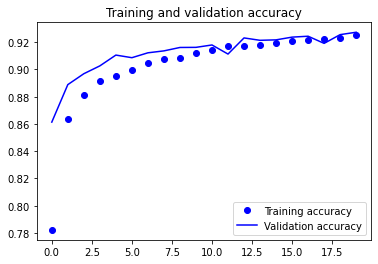

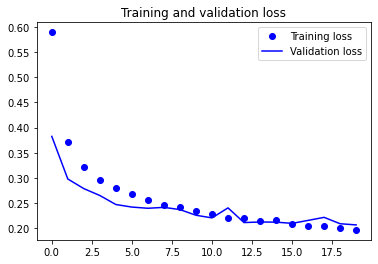

In [38]:
# Plotting curves of performance
accuracy = fashion_train_dropout.history['accuracy']
val_accuracy = fashion_train_dropout.history['val_accuracy']
loss = fashion_train_dropout.history['loss']
val_loss = fashion_train_dropout.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


In [ ]:
# Clearly better performance than before

In [39]:
# prediction of labels
predicted_classes = fashion_model.predict(test_X)


In [40]:
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)


In [41]:
predicted_classes.shape, test_Y.shape


((10000,), (10000,))

Found 9192 correct labels


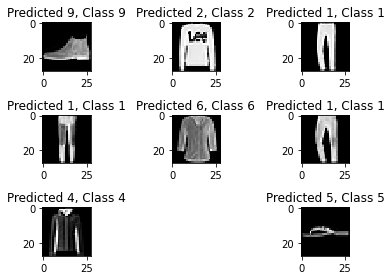

In [43]:
# correct classified
correct = np.where(predicted_classes==test_Y)[0]
print("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], test_Y[correct]))
    plt.tight_layout()


Found 808 incorrect labels


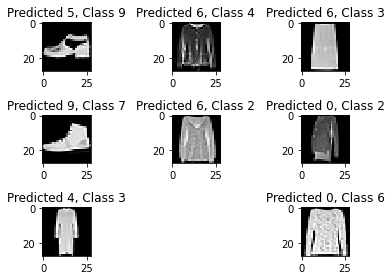

In [44]:
# incorrect classified

incorrect = np.where(predicted_classes!=test_Y)[0]
print("Found %d incorrect labels" % len(incorrect))
for i, incorrect in enumerate(incorrect[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], test_Y[incorrect]))
    plt.tight_layout()


In [45]:
# Analyzing worse product classified. It seems clas 6
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(test_Y, predicted_classes, target_names=target_names))


              precision    recall  f1-score   support

     Class 0       0.82      0.85      0.84      1000
     Class 1       0.99      0.99      0.99      1000
     Class 2       0.90      0.87      0.88      1000
     Class 3       0.92      0.93      0.92      1000
     Class 4       0.88      0.87      0.88      1000
     Class 5       0.99      0.98      0.99      1000
     Class 6       0.76      0.78      0.77      1000
     Class 7       0.96      0.98      0.97      1000
     Class 8       0.99      0.98      0.99      1000
     Class 9       0.97      0.97      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000

